<a href="https://colab.research.google.com/github/kridtapon/SlopeR-Breakout/blob/main/SlopeR_Breakout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install vectorbt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.6/527.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.0 MB/s eta 0:00:00


In [1]:
pip install --upgrade yfinance

In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt
from sklearn.linear_model import LinearRegression

# Function to calculate Williams %R
def calculate_williams_r(high, low, close, period=14):
    highest_high = high.rolling(window=period).max()
    lowest_low = low.rolling(window=period).min()
    return -100 * (highest_high - close) / (highest_high - lowest_low)

# Function to calculate linear regression trendline projection
def calculate_trendline_projection(df, window=200):
    slope = np.full(len(df), np.nan)

    for i in range(window, len(df)):
        y = df['Close'][i-window:i].values.reshape(-1, 1)
        x = np.arange(0, window).reshape(-1, 1)

        model = LinearRegression().fit(x, y)
        slope[i] = model.coef_[0][0]  # Get the slope of the linear regression

    return pd.Series(slope, index=df.index)

# Define the stock symbol and time period
symbol = 'ANET'
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Calculate the Williams %R
df['Williams_R'] = calculate_williams_r(df['High'], df['Low'], df['Close'], period=14)

# Calculate the Linear regression slope
df['Slope'] = calculate_trendline_projection(df, window=200)

# Filter data for the test period (2020-2025)
df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Define Entry and Exit signals based on the Moving Average Slope and Williams %R
df['Entry'] = (df['Slope'] > 0) & (df['Williams_R'] > -50)
df['Exit'] = (df['Slope'] < 0) & (df['Williams_R'] < -50)

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()


[*********************100%***********************]  1 of 1 completed
<ipython-input-4-08430b5a03bd>:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-4-08430b5a03bd>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to

Start                         2020-01-02 00:00:00
End                           2024-12-31 00:00:00
Period                                       1258
Start Value                              100000.0
End Value                            721726.71756
Total Return [%]                       621.726718
Benchmark Return [%]                   763.853053
Max Gross Exposure [%]                      100.0
Total Fees Paid                        556.717004
Max Drawdown [%]                        38.422773
Max Drawdown Duration                       307.0
Total Trades                                    2
Total Closed Trades                             1
Total Open Trades                               1
Open Trade PnL                      493318.494059
Win Rate [%]                                100.0
Best Trade [%]                         128.536632
Worst Trade [%]                        128.536632
Avg Winning Trade [%]                  128.536632
Avg Losing Trade [%]                          NaN


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set

<ipython-input-11-b5e2e92d5a40>:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-11-b5e2e92d5a40>:62: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/lo

Best Parameters: {'trendline_window': 10, 'williams_period': 25, 'williams_threshold': -70}
Best Total Return: 326.02449811483905


<ipython-input-11-b5e2e92d5a40>:99: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-11-b5e2e92d5a40>:100: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/

Start                         2020-01-02 00:00:00
End                           2024-12-31 00:00:00
Period                                       1258
Start Value                              100000.0
End Value                           426024.498115
Total Return [%]                       326.024498
Benchmark Return [%]                   262.338222
Max Gross Exposure [%]                      100.0
Total Fees Paid                      10597.016247
Max Drawdown [%]                        31.618213
Max Drawdown Duration                       502.0
Total Trades                                   27
Total Closed Trades                            26
Total Open Trades                               1
Open Trade PnL                       -5964.142712
Win Rate [%]                                 50.0
Best Trade [%]                          56.341939
Worst Trade [%]                         -7.740535
Avg Winning Trade [%]                   18.392642
Avg Losing Trade [%]                    -4.332202


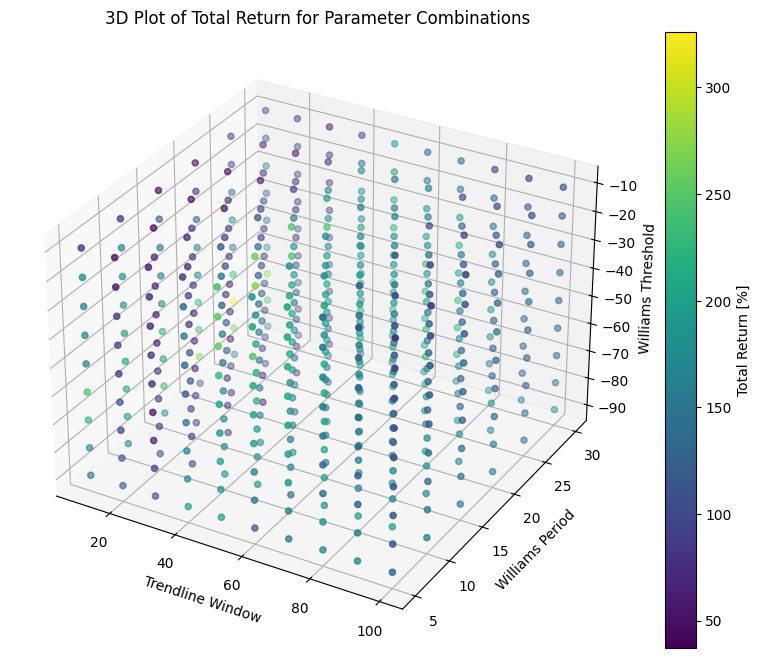

In [11]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt
from sklearn.linear_model import LinearRegression
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to calculate Williams %R
def calculate_williams_r(high, low, close, period=14):
    highest_high = high.rolling(window=period).max()
    lowest_low = low.rolling(window=period).min()
    return -100 * (highest_high - close) / (highest_high - lowest_low)

# Function to calculate linear regression trendline projection
def calculate_trendline_projection(df, window=200):
    slope = np.full(len(df), np.nan)
    for i in range(window, len(df)):
        y = df['Close'][i-window:i].values.reshape(-1, 1)
        x = np.arange(0, window).reshape(-1, 1)
        model = LinearRegression().fit(x, y)
        slope[i] = model.coef_[0][0]  # Get the slope of the linear regression
    return pd.Series(slope, index=df.index)

# Define the stock symbol and time period
symbol = 'TSM'
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Generate parameter combinations to test
trendline_windows = range(10, 101, 10)
williams_periods = range(5, 31, 5)
williams_thresholds = range(-90, 0, 10)

# Initialize variables to store the best results
best_total_return = -np.inf
best_params = {}

# Store the results for plotting
results = []

# Generate all combinations of parameters using itertools
param_combinations = itertools.product(trendline_windows, williams_periods, williams_thresholds)

for trendline_window, williams_period, williams_threshold in param_combinations:
    # Calculate Williams %R
    df['Williams_R'] = calculate_williams_r(df['High'], df['Low'], df['Close'], period=williams_period)

    # Calculate the Linear regression slope
    df['Slope'] = calculate_trendline_projection(df, window=trendline_window)

    # Filter data for the test period (2020-2025)
    df_filter = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

    # Define Entry and Exit signals based on the Moving Average Slope and Williams %R
    df_filter['Entry'] = (df_filter['Slope'] > 0) & (df_filter['Williams_R'] > williams_threshold)
    df_filter['Exit'] = (df_filter['Slope'] < 0) & (df_filter['Williams_R'] < williams_threshold)

    # Backtest using vectorbt
    portfolio = vbt.Portfolio.from_signals(
        close=df_filter['Close'],
        entries=df_filter['Entry'],
        exits=df_filter['Exit'],
        init_cash=100_000,
        fees=0.001
    )

    # Calculate performance metric (e.g., Total Return [%])
    total_return = portfolio.stats()['Total Return [%]']

    # Store the result for 3D plot
    results.append((trendline_window, williams_period, williams_threshold, total_return))

    # Check if the current combination performs better
    if total_return > best_total_return:
        best_total_return = total_return
        best_params = {
            'trendline_window': trendline_window,
            'williams_period': williams_period,
            'williams_threshold': williams_threshold
        }

# Display the best parameter combination and corresponding Total Return
print("Best Parameters:", best_params)
print("Best Total Return:", best_total_return)

# Calculate performance with the best parameters
df['Williams_R'] = calculate_williams_r(df['High'], df['Low'], df['Close'], period=best_params['williams_period'])
df['Slope'] = calculate_trendline_projection(df, window=best_params['trendline_window'])

# Filter data for the test period (2020-2025)
df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

df['Entry'] = (df['Slope'] > 0) & (df['Williams_R'] > best_params['williams_threshold'])
df['Exit'] = (df['Slope'] < 0) & (df['Williams_R'] < best_params['williams_threshold'])

# Backtest using vectorbt with the best parameters
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()

# Prepare data for 3D plot
results = np.array(results)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the results
sc = ax.scatter(results[:, 0], results[:, 1], results[:, 2], c=results[:, 3], cmap='viridis')

# Set labels
ax.set_xlabel('Trendline Window')
ax.set_ylabel('Williams Period')
ax.set_zlabel('Williams Threshold')
ax.set_title('3D Plot of Total Return for Parameter Combinations')

# Add color bar
cbar = plt.colorbar(sc)
cbar.set_label('Total Return [%]')

# Show the plot
plt.show()


In [7]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt
from sklearn.linear_model import LinearRegression
import itertools

# Function to calculate Williams %R
def calculate_williams_r(high, low, close, period=14):
    highest_high = high.rolling(window=period).max()
    lowest_low = low.rolling(window=period).min()
    return -100 * (highest_high - close) / (highest_high - lowest_low)

# Function to calculate linear regression trendline projection
def calculate_trendline_projection(df, window=200):
    slope = np.full(len(df), np.nan)
    for i in range(window, len(df)):
        y = df['Close'][i-window:i].values.reshape(-1, 1)
        x = np.arange(0, window).reshape(-1, 1)
        model = LinearRegression().fit(x, y)
        slope[i] = model.coef_[0][0]  # Get the slope of the linear regression
    return pd.Series(slope, index=df.index)

# Define the stock symbol and time period
symbol = 'TSM'
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Generate parameter combinations to test
trendline_windows = range(10, 101, 10)
williams_periods = range(5, 31, 5)
williams_thresholds = range(-90, 0, 10)

# Initialize variables to store the best results
best_total_return = -np.inf
best_params = {}

# Generate all combinations of parameters using itertools
param_combinations = itertools.product(trendline_windows, williams_periods, williams_thresholds)

for trendline_window, williams_period, williams_threshold in param_combinations:
    # Calculate Williams %R
    df['Williams_R'] = calculate_williams_r(df['High'], df['Low'], df['Close'], period=williams_period)

    # Calculate the Linear regression slope
    df['Slope'] = calculate_trendline_projection(df, window=trendline_window)

    # Filter data for the test period (2020-2025)
    df_filter = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

    # Define Entry and Exit signals based on the Moving Average Slope and Williams %R
    df_filter['Entry'] = (df_filter['Slope'] > 0) & (df_filter['Williams_R'] > williams_threshold)
    df_filter['Exit'] = (df_filter['Slope'] < 0) & (df_filter['Williams_R'] < williams_threshold)

    # Backtest using vectorbt
    portfolio = vbt.Portfolio.from_signals(
        close=df_filter['Close'],
        entries=df_filter['Entry'],
        exits=df_filter['Exit'],
        init_cash=100_000,
        fees=0.001
    )

    # Calculate performance metric (e.g., Total Return [%])
    total_return = portfolio.stats()['Total Return [%]']

    # Check if the current combination performs better
    if total_return > best_total_return:
        best_total_return = total_return
        best_params = {
            'trendline_window': trendline_window,
            'williams_period': williams_period,
            'williams_threshold': williams_threshold
        }

# Display the best parameter combination and corresponding Sharpe ratio
print("Best Parameters:", best_params)
print("Best Total Return:", best_total_return)

# Calculate performance with the best parameters
df['Williams_R'] = calculate_williams_r(df['High'], df['Low'], df['Close'], period=best_params['williams_period'])
df['Slope'] = calculate_trendline_projection(df, window=best_params['trendline_window'])
df['Entry'] = (df['Slope'] > 0) & (df['Williams_R'] > best_params['williams_threshold'])
df['Exit'] = (df['Slope'] < 0) & (df['Williams_R'] < best_params['williams_threshold'])

# Backtest using vectorbt with the best parameters
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set

<ipython-input-7-4cd95840114b>:56: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-7-4cd95840114b>:57: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/loca

KeyboardInterrupt: 